<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-of-standard-libraries" data-toc-modified-id="Import-of-standard-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import of standard libraries</a></span></li><li><span><a href="#The-Linear-Programming-Problem" data-toc-modified-id="The-Linear-Programming-Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The Linear Programming Problem</a></span></li><li><span><a href="#Graphical-Illustration" data-toc-modified-id="Graphical-Illustration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Graphical Illustration</a></span><ul class="toc-item"><li><span><a href="#Utilities" data-toc-modified-id="Utilities-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Utilities</a></span></li><li><span><a href="#Global-Visualistion" data-toc-modified-id="Global-Visualistion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Global Visualistion</a></span></li><li><span><a href="#Visualisation-around-Optimal-Solution" data-toc-modified-id="Visualisation-around-Optimal-Solution-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Visualisation around Optimal Solution</a></span></li></ul></li></ul></div>

# Import of standard libraries

In [1]:
# Import required library
import matplotlib.pyplot as plt
import scipy.optimize as opt

# The Linear Programming Problem

A decision has to be made on the usage of farm land for wheat and barley.

Variables:

- $x_0$: area of wheat (ha)
- $x_1$: area of barley (ha)

Condition based on farm size:

$x_0 + x_1 \le f$

In [2]:
farm_size=40 # ha

Production costs:

- Wheat: $c_w$ (€/ha)
- Barley: $c_b$ (€/ha)

Condition based on available reserves:

$c_{w}x_0 + c_{b}x_1 \le R$

In [3]:
cost_wheat=1360 # €/ha    1350
cost_barley=1150 # €/ha   1150
reserves=50000 # €

Optimize margin (without labour cost)

In [4]:
price_wheat=170 # €/t
yield_wheat=10 # t/ha
price_wheat_straw=243 # €/ha
income_wheat=price_wheat*yield_wheat+price_wheat_straw # €/ha

price_barley=160 # €/t
yield_barley=9 # t/ha
price_barley_straw=300 # €/ha
income_barley=price_barley*yield_barley+price_barley_straw # €/ha

In [5]:
# Input parameters and bounds
A = [[1,1], [cost_wheat, cost_barley]]
b = [farm_size,reserves]
c = [-income_wheat, -income_barley]
limits=((0, farm_size),(0, farm_size))

In [6]:
# Run the model
res = opt.linprog(c, A, b, bounds=limits,method='simplex')

In [7]:
# Get results
res

     con: array([], dtype=float64)
     fun: -73466.66666666667
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([19.04761905, 20.95238095])

In [8]:
# Access each variable x1 and x2
x0 = res.x[0]
x1 = res.x[1]
(x0, x1)

(19.047619047619055, 20.952380952380945)

In [9]:
opt_val = int(res.fun)
opt_val

-73466

# Graphical Illustration

## Utilities

$a_{i,0}x+a_{i,1}y \le b_{i}$  implies $y \le \frac{b_{i}-a_{i,0}x}{a_{i,1}}$

In [ ]:
def line(A,b,i,x):
    return (b[i]-A[i][0]*x)/A[i][1]

$c_{0}x+c_{1}y = g$ implies  $y = \frac{g - c_{0}x}{c_{1}}$

In [ ]:
def grad(c,g,x):
    return (g-c[0]*x)/c[1]

In [10]:
def MIN(a, b):
    return b if a==None else a if b==None else min(a,b)

def MAX(a, b):
    return b if a==None else a if b==None else max(a,b)
    
def plot_linopt(A, b, c, bounds, res, 
                borders=None, dx=5, dy=5,
                title=None, labels=None, 
                solution=None, legend=None, output=False):
 
    ax=plt.axes()
    ax.grid(True)
    
    if borders==None:
        borders=[(res.x[0]-dx, res.x[0]+dx),
                 (res.x[1]-dy, res.x[1]+dy)]
    
    # set drawing region (xmin, xmax) (ymin, ymax)
    xmin = borders[0][0]
    xmax = borders[0][1]
    ymin = borders[1][0]
    ymax = borders[1][1]
    
    ax.set_xlim((xmin,xmax))
    ax.set_ylim((ymin,ymax))
    if labels!=None:
        plt.xlabel(labels[0])
        plt.ylabel(labels[1])

    if legend==None:
        legend=[]
        for i in range(0, len(A)):
            legend+=['Constraint '+str(i)]
    
    if solution==None:
        solution='Solution'
        

    
    # compute visual bounds (drawing limits if there is no bound)
    xleft = MAX(bounds[0][0], borders[0][0])
    xright = MIN(bounds[0][1], borders[0][1])
    ybottom = MAX(bounds[1][0], borders[1][0]) 
    ytop = MIN(bounds[1][1], borders[1][1])
    
    # plot constraints
    x=[xmin,xmax]
    lines=[]
    for i in range(0, len(A)):
        y = [line(A,b,i,xmin), line(A,b,i,xmax)]
        l=plt.plot(x,y,label=legend[i])
        plt.fill_between(x, y, ymin if A[i][1]>0 else ymax, alpha=0.3)
        lines=lines+[l[0]]
    
    # plot bounding box
    rangex=[xleft, xright, xright, xleft, xleft]
    rangey=[ybottom, ybottom, ytop, ytop, ybottom]
    l=plt.plot(rangex, rangey,label='Bounds')
    plt.fill_between(rangex, rangey, alpha=0.3)
    lines+=[l[0]]

    # plot optimal cost function
    x=[xmin,xmax]
    lopt=plt.plot(x, [grad(c,res.fun,xmin),grad(c,res.fun,xmax)], 
                  color='red', label=solution)    

    # plot optimal solution
    plt.plot(res.x[0],res.x[1],'ro')

    if legend!=None:
        plt.legend(handles=lines+[lopt[0]])
        
    if title!=None: 
        plt.suptitle(title)
    
    if output:
        print(solution, '=', res.fun)
        for i in range(0, len(c)):
            print(labels[i],'=',res.x[i])

## Global Visualistion

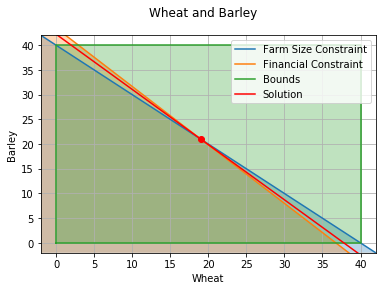

In [11]:
# Drawing 
# fig=plt.figure(figsize=(4,4), dpi=300)
plot_linopt(A, b, c, limits, res, 
            borders=[(-2, 42), (-2,42)], 
            title='Wheat and Barley',
            labels=['Wheat', 'Barley'], 
            legend=['Farm Size Constraint', 
                    'Financial Constraint'])

## Visualisation around Optimal Solution

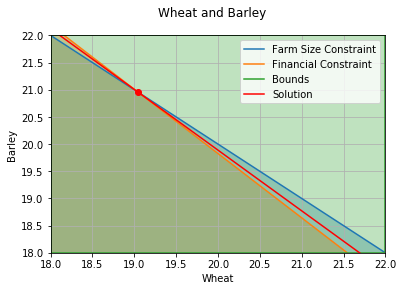

In [17]:
# Drawing 
# fig=plt.figure(figsize=(4,4), dpi=300)
plot_linopt(A, b, c, limits, res,
            borders=[(18, 22), (18,22)], 
            title='Wheat and Barley',
            labels=['Wheat', 'Barley'], 
            legend=['Farm Size Constraint', 
                    'Financial Constraint'])